In [9]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
node_df = pd.read_csv('5tables/NodeLabels.tsv', sep='\t')
node_df.head()

,term,label
0,Microsoft,ORG
1,ISBN,ORG
2,China,GPE
3,Facebook,ORG
4,Apple,ORG


In [8]:
edge_df = pd.read_csv('5tables/Connectivity.tsv', sep='\t')
edge_df.head()

,EdgeID,FromNode,ToNode,EdgeLabel
0,5,adam pisoni,yammer,founded
1,6,adam somlai-fischer,prezi,founded
2,7,adeyemi ajao,tuenti,founded
3,9,allen blue,linkedin,founded
4,13,apple inc.,apple mail,developed by


In [13]:
mask = (node_df.term.str.lower().isin(edge_df.FromNode)
         | node_df.term.str.lower().isin(edge_df.ToNode))
print(node_df.shape)
print(np.sum(mask))

(42953, 2)
3165


In [63]:
node_types = node_df[mask].label.value_counts()
plot_order = node_types.index.values
node_types

NAICS          2193
ORG             472
PERSON          218
PRODUCT          82
GPE              52
WORK_OF_ART      36
NORP             29
LOC              27
FAC              25
MONEY            12
EVENT             5
LANGUAGE          5
QUANTITY          4
LAW               2
Name: label, dtype: int64

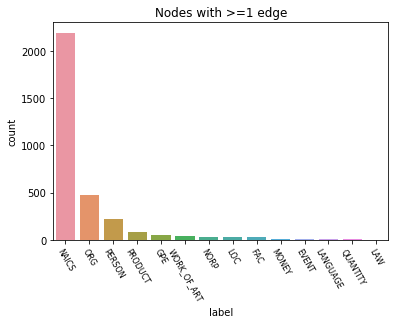

In [68]:
ax = sns.countplot(x='label', data=node_df[mask], order=plot_order)
ax.set_title("Nodes with >=1 edge")
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_fontsize(8)

In [65]:
node_types = node_df.label.value_counts()
node_types

ORG            14234
PERSON         12475
GPE             4254
NAICS           2196
PRODUCT         1582
WORK_OF_ART     1572
NORP            1489
PERCENT         1034
LOC              908
MONEY            889
FAC              878
QUANTITY         442
EVENT            431
LAW              415
LANGUAGE         151
Name: label, dtype: int64

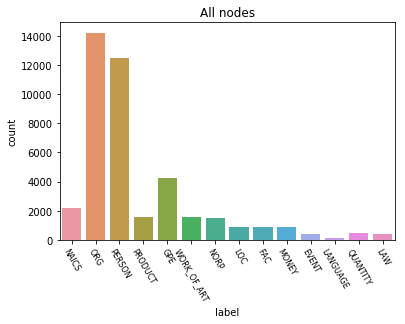

In [67]:
ax = sns.countplot(x='label', data=node_df,  order=plot_order)
ax.set_title("All nodes")
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_fontsize(8)

In [72]:
edge_df.EdgeLabel.value_counts()

naics            5190
contains         2132
acquired          242
invested          178
compete           134
in_litigation      78
is key to          53
owns               36
developed by       34
founded            31
authored           10
purchase           10
naicscode           3
Name: EdgeLabel, dtype: int64

In [73]:
mask = edge_df.EdgeLabel != 'naicscode'
edge_df[mask].EdgeLabel.value_counts()

naics            5190
contains         2132
acquired          242
invested          178
compete           134
in_litigation      78
is key to          53
owns               36
developed by       34
founded            31
authored           10
purchase           10
Name: EdgeLabel, dtype: int64

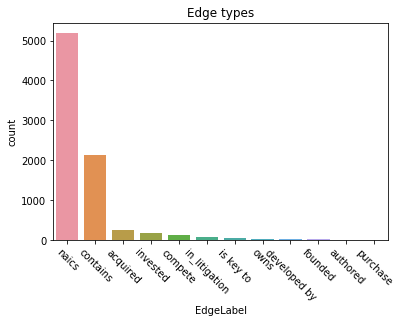

In [82]:
plot_order = edge_df[mask].EdgeLabel.value_counts().index.values
ax = sns.countplot(x='EdgeLabel', data=edge_df[mask], order=plot_order)
ax.set_title("Edge types")
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
    tick.set_fontsize(10)

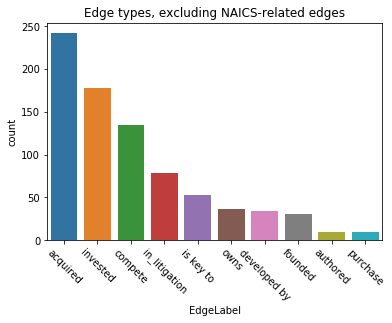

In [81]:
plot_order = edge_df[mask].EdgeLabel.value_counts().index.values

ax = sns.countplot(x='EdgeLabel',
                   data=edge_df[mask & (~edge_df.EdgeLabel.isin(['naics', 'contains']))],
                   order=plot_order[2:])
ax.set_title("Edge types, excluding NAICS-related edges")
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
    tick.set_fontsize(10)